In [1]:
import numpy as np
import pandas as pd
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

In [2]:
df=pd.read_csv('HospitalCosts.csv')
df.head(5)

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


LOS = Length of Stay\ TOTCHG = Hospital Dsicharge Cost\ APRDRG = All Patient Refined Diagnosis Related Groups\

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     500 non-null    int64  
 1   FEMALE  500 non-null    int64  
 2   LOS     500 non-null    int64  
 3   RACE    499 non-null    float64
 4   TOTCHG  500 non-null    int64  
 5   APRDRG  500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB


#### renaming columns 'female' as 'gender' (where female=1 and male=0) and TOTCHG as 'cost'

In [4]:
df.rename({"FEMALE": "GENDER","TOTCHG":"COST"}, axis=1, inplace=True)
df.head()

,AGE,GENDER,LOS,RACE,COST,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


#### Sorting data by "AGE" in descending order

In [5]:
df.sort_values(by=["AGE","GENDER"], ascending=False, inplace=True)
df

,AGE,GENDER,LOS,RACE,COST,APRDRG
0,17,1,2,1.0,2660,560
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
6,17,1,4,1.0,2205,754
...,...,...,...,...,...,...
489,0,0,2,1.0,1264,640
490,0,0,2,1.0,1282,640
491,0,0,2,1.0,1393,640
493,0,0,2,1.0,1266,640


#### Creating a separate Dataframe for viewing rows with null values

In [6]:
df_NaN = df[df.isnull().any(axis=1)]
df_NaN

,AGE,GENDER,LOS,RACE,COST,APRDRG
276,0,1,2,NaN,1156,640


In [7]:
# Filling missing 'Race' values with mode:
df.RACE=df.RACE.fillna(df.RACE.mode())
df.RACE

0      1.0
2      1.0
3      1.0
4      1.0
6      1.0
      ... 
489    1.0
490    1.0
491    1.0
493    1.0
499    1.0
Name: RACE, Length: 500, dtype: float64

In [8]:
#describe data
df.describe()[["AGE", "LOS", "COST"]]

,AGE,LOS,COST
count,500.000000,500.000000,500.000000
mean,5.086000,2.828000,2774.388000
std,6.949474,3.363487,3888.407367
min,0.000000,0.000000,532.000000
25%,0.000000,2.000000,1216.250000
50%,0.000000,2.000000,1536.500000
75%,13.000000,3.000000,2530.250000
max,17.000000,41.000000,48388.000000


#### Age category of people who frequent the hospital

<AxesSubplot:>

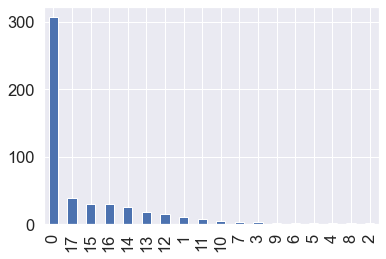

In [9]:
df['AGE'].value_counts().plot.bar()

It can be clearly seen that most of the patients are newborn babies.

#### creating a new column to calculate cost of stay per day for each patient

In [10]:
df=df.loc[(df.LOS>0)].copy()
df["Cost_day"] = df["COST"] / df["LOS"]
df.sort_values("Cost_day", ascending=False)

,AGE,GENDER,LOS,RACE,COST,APRDRG,Cost_day
308,15,0,1,1.0,12024,92,12024.000000
398,9,0,1,1.0,10585,308,10585.000000
256,16,0,1,2.0,8159,313,8159.000000
166,3,0,1,1.0,8084,57,8084.000000
22,12,0,1,1.0,7421,249,7421.000000
...,...,...,...,...,...,...,...
464,0,1,3,1.0,1517,640,505.666667
196,0,1,3,1.0,1505,640,501.666667
76,0,1,3,1.0,1499,640,499.666667
431,0,1,3,1.0,1431,640,477.000000


#### plotting boxplot and barplot of Cost per day v/s AGE

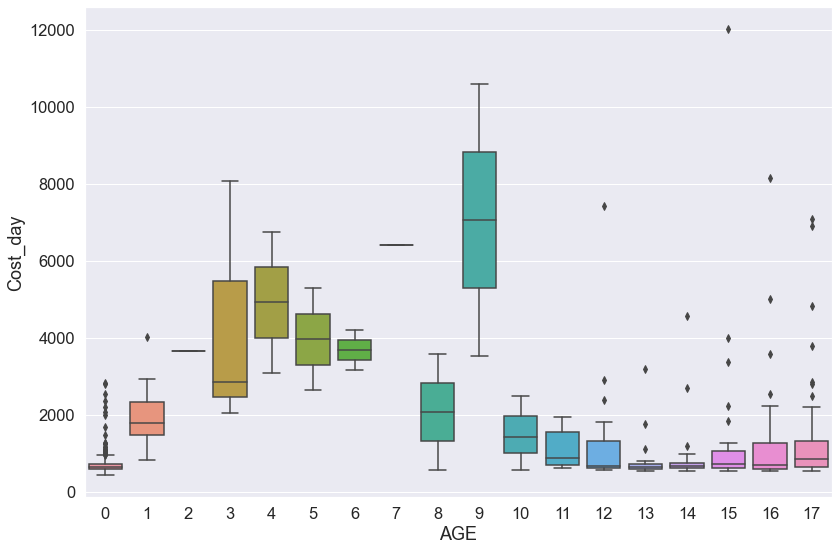

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="AGE", y="Cost_day")
plt.tight_layout()

<AxesSubplot:xlabel='AGE', ylabel='COST'>

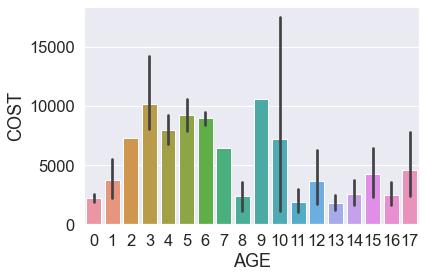

In [12]:
sns.barplot(data=df, x="AGE", y="COST")

#### mean cost by age

In [13]:
df[['AGE','COST']].groupby("AGE", as_index=False).mean().sort_values("COST", ascending=False)

,AGE,COST
9,9,10573.500000
3,3,10183.333333
5,5,9253.500000
6,6,8964.000000
4,4,7996.000000
2,2,7298.000000
10,10,7181.333333
7,7,6425.000000
17,17,4634.378378
15,15,4227.230769


#### total COST for each AGE sorted in decreased order of AGE

In [14]:
df[['AGE','COST']].groupby("AGE", as_index=False).sum().sort_values("COST", ascending=False)

,AGE,COST
0,0,672125
17,17,171472
15,15,109908
16,16,64722
14,14,64643
12,12,54912
1,1,37744
3,3,30550
13,13,30226
10,10,21544


#### plotting barplot of LOS v/s AGE

<AxesSubplot:xlabel='AGE', ylabel='LOS'>

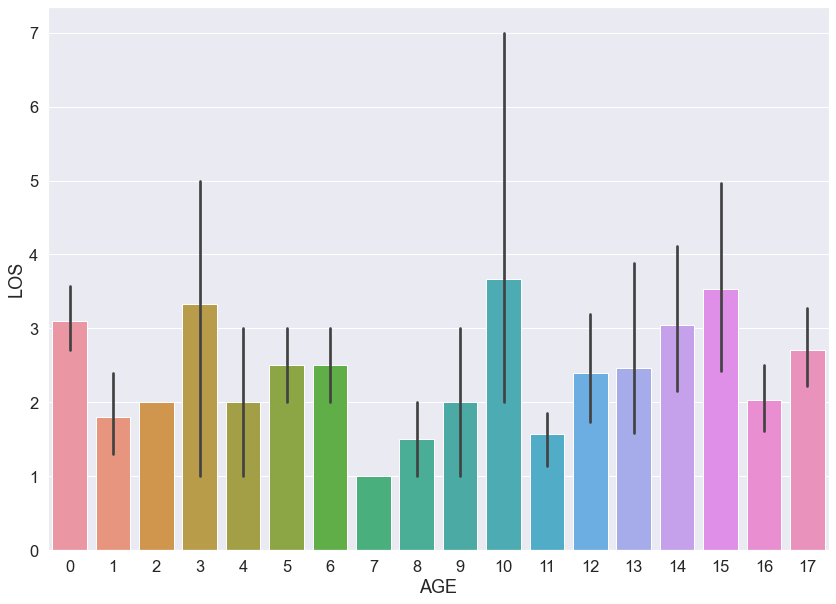

In [15]:
plt.figure(figsize=(14,10))
sns.barplot(data=df, x="AGE", y="LOS")

#### mean LOS by age

In [16]:
df[['AGE','LOS']].groupby("AGE", as_index=False).sum().sort_values("LOS", ascending=False)

,AGE,LOS
0,0,941
17,17,100
15,15,92
14,14,76
16,16,53
13,13,42
12,12,36
1,1,18
10,10,11
11,11,11


### Task 1:
#### To record the patient statistics, the agency wants to find the age category of people who frequent the hospital and has the maximum expenditure.
### RESULT:
#### Age category between 0-3 and 12-17 frequent hospital the most and 3-9 has maximum expenditure.

### Exploring diagnosis related group 

#### Most frequent diagnosis

In [17]:
df["APRDRG"].value_counts().sort_values(ascending=False)

640    267
753     35
754     32
758     20
751     14
      ... 
137      1
143      1
581      1
421      1
561      1
Name: APRDRG, Length: 62, dtype: int64

<AxesSubplot:xlabel='APRDRG'>

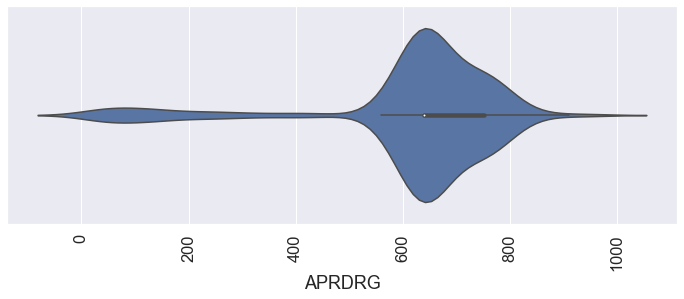

In [18]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=90)
sns.violinplot(data=df, x="APRDRG")

scatterplot of COST v/s LOS hued according to APRDRG

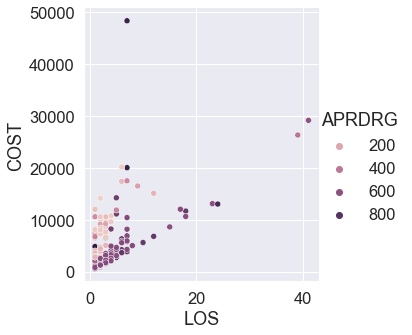

In [19]:
sns.relplot(x="LOS", y="COST",hue="APRDRG", data=df)

#### Diagnosis vs cost

In [20]:
df.groupby(["APRDRG"]).mean()["COST"].sort_values(ascending=False)[:20]

APRDRG
911    48388.0
602    29188.0
421    26356.0
49     20195.0
317    17524.0
137    15129.0
720    14243.0
23     14174.0
930    13327.0
863    13040.0
115    12916.0
225    12824.5
92     12024.0
344    11877.0
740    11125.0
308    10585.0
114    10562.0
21     10002.0
97      9530.0
206     9230.0
Name: COST, dtype: float64

#### Diagnosis vs length of stay

In [21]:
df.groupby(["APRDRG"]).mean()["LOS"].sort_values(ascending=False)[:10]

APRDRG
602    41.000000
421    39.000000
863    24.000000
614    15.000000
137    12.000000
760     7.000000
317     7.000000
911     7.000000
636     6.666667
633     6.250000
Name: LOS, dtype: float64

### Task 2
#### To find out the expensive treatments, the agency wants to find the diagnosis related group that has maximum hospitalization and expenditure.
### Result:
#### 911 has highest expenditure whereas 640 frequent hospital the most and 602 has highest LOS among all.

### Exploring the relationship race-hospitalization costs

#### Most frequent patients' race

In [22]:
df["RACE"].value_counts().sort_index()

1.0    470
2.0      6
3.0      1
4.0      3
5.0      2
6.0      2
Name: RACE, dtype: int64

#### correlation race-cost

<AxesSubplot:xlabel='RACE', ylabel='COST'>

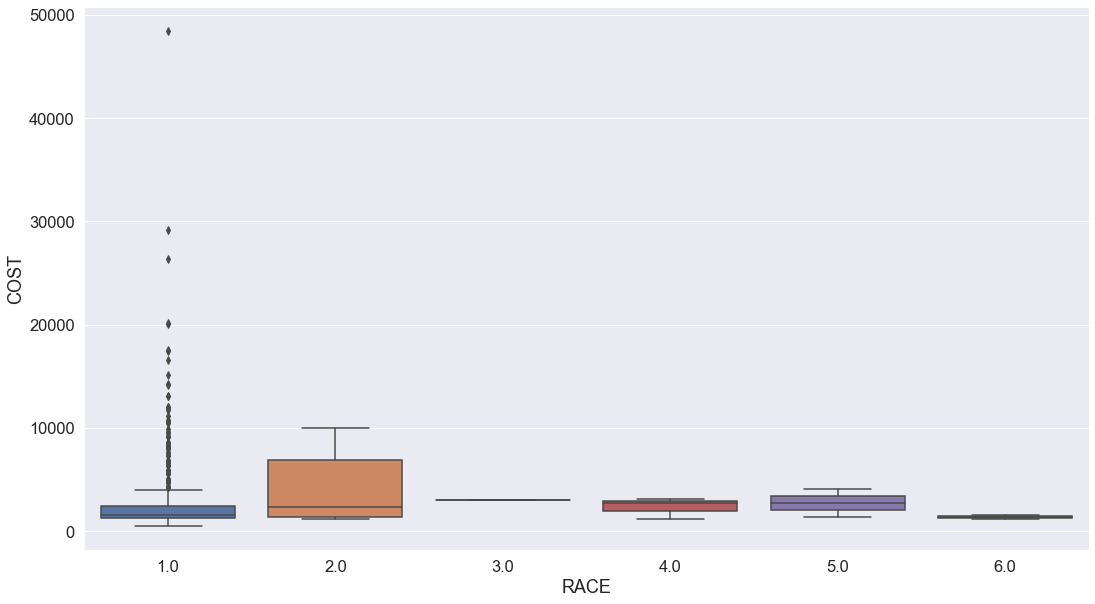

In [23]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=df, x="RACE", y="COST")

In [24]:
df.groupby(["RACE"]).mean()["COST"].sort_values(ascending=False)

RACE
2.0    4202.166667
3.0    3041.000000
1.0    2805.306383
5.0    2732.500000
4.0    2344.666667
6.0    1349.000000
Name: COST, dtype: float64

From overall mean of COST, we can see that RACE 2.0 and 3.0 has higher average cost. Thus, we will examine RACE 2.0 and 3.0.

In [25]:
df_race=df[(df.RACE==2.0)|(df.RACE==3.0)]
df_race

,AGE,GENDER,LOS,RACE,COST,APRDRG,Cost_day
256,16,0,1,2.0,8159,313,8159.00
303,16,0,2,2.0,10002,21,5001.00
492,15,1,4,2.0,3074,758,768.50
41,11,1,2,2.0,1534,753,767.00
410,8,0,2,2.0,1153,758,576.50
402,0,1,4,3.0,3041,626,760.25
282,0,0,2,2.0,1291,640,645.50


In [26]:
df_race2=df_race[(df_race.RACE==2.0)]
df_race2[['COST','APRDRG']].describe()

,COST,APRDRG
count,6.000000,6.000000
mean,4202.166667,540.500000
std,3884.810905,307.019706
min,1153.000000,21.000000
25%,1351.750000,394.750000
50%,2304.000000,696.500000
75%,6887.750000,756.750000
max,10002.000000,758.000000


#### finding what are the highest costs related to APRDRG and LOS that generate outliers on race 2.0

In [27]:
df_race2.groupby("APRDRG", as_index=False)[['COST','LOS']].max().sort_values("COST",ascending=False)

,APRDRG,COST,LOS
0,21,10002,2
1,313,8159,1
4,758,3074,4
3,753,1534,2
2,640,1291,2


#### checking if APRDRG 753 and 758 that raise the mean for race 2.0 have the same cost, cost per day and LOS for races 1.0 and race 3.0 if there were patients with those APRDRG

In [28]:
df_Diagn=df.loc[(df.APRDRG==753)|(df.APRDRG==758)]
df_Diagn=df_Diagn.loc[(df.RACE==1.0)|(df.RACE==2.0)|(df.RACE==3.0)]
df_Diagn.groupby('RACE', as_index=False).max()

,RACE,AGE,GENDER,LOS,COST,APRDRG,Cost_day
0,1.0,17,1,18,11685,758,3800.0
1,2.0,15,1,4,3074,758,768.5


In [29]:
df_race3=df_race[(df_race.RACE==3.0)]
df_race3[['COST','APRDRG']].describe()

,COST,APRDRG
count,1.0,1.0
mean,3041.0,626.0
std,NaN,NaN
min,3041.0,626.0
25%,3041.0,626.0
50%,3041.0,626.0
75%,3041.0,626.0
max,3041.0,626.0


In [30]:
df_race3.groupby("APRDRG", as_index=False)[['COST','LOS']].max().sort_values("COST",ascending=False)

,APRDRG,COST,LOS
0,626,3041,4


In [31]:
df.groupby(["RACE"]).describe()["COST"][0:1]

,count,mean,std,min,25%,50%,75%,max
RACE,,,,,,,,
1.0,470.0,2805.306383,3974.366698,532.0,1232.25,1540.5,2394.0,48388.0


In [32]:
df_race1=df[(df.RACE==1.0)]
df_race1.groupby("APRDRG", as_index=False)[['COST','LOS']].max().sort_values("COST",ascending=False)[0:16]

,APRDRG,COST,LOS
56,911,48388,7
32,602,29188,41
25,421,26356,39
1,49,20195,6
57,930,20060,7
21,317,17524,7
11,115,17434,6
18,225,16520,9
12,137,15129,12
41,720,14243,5


There are many outliers of RACE 1.0 since diagnosis groups are among the most expensive ones requiring a longer LOS; however mean is almost as overall mean. RACE 2.0 has 2 outliers and has a very high mean. t appears that for APRDRG 758 the costs are higher for race 2.0 than for race 1.0. Recommended investigation.

### Task 3:
#### To make sure that there is no malpractice, the agency needs to analyze if the race of the patient is related to the hospitalization costs.
### Result:
#### RACE 2.0 has higher mean of COST than other races and is also considerably higher than overall mean of COST. Thus, RACE 2.0 people might be unjustly treated and hospital should look into this matter.

### analyzing the severity of the hospital costs by age and gender

<AxesSubplot:xlabel='GENDER', ylabel='COST'>

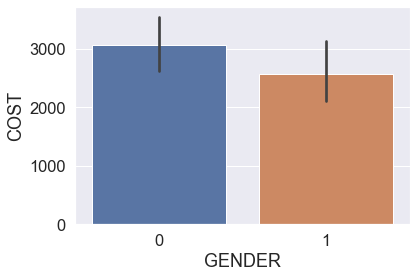

In [33]:
sns.barplot(data=df, x="GENDER", y="COST")

In [34]:
df.groupby(["GENDER"]).describe()["COST"]

,count,mean,std,min,25%,50%,75%,max
GENDER,,,,,,,,
0,236.0,3061.944915,3594.449765,550.0,1290.75,1671.5,2841.25,26356.0
1,249.0,2572.216867,4232.872371,532.0,1156.00,1436.0,2238.00,48388.0


<AxesSubplot:xlabel='AGE', ylabel='COST'>

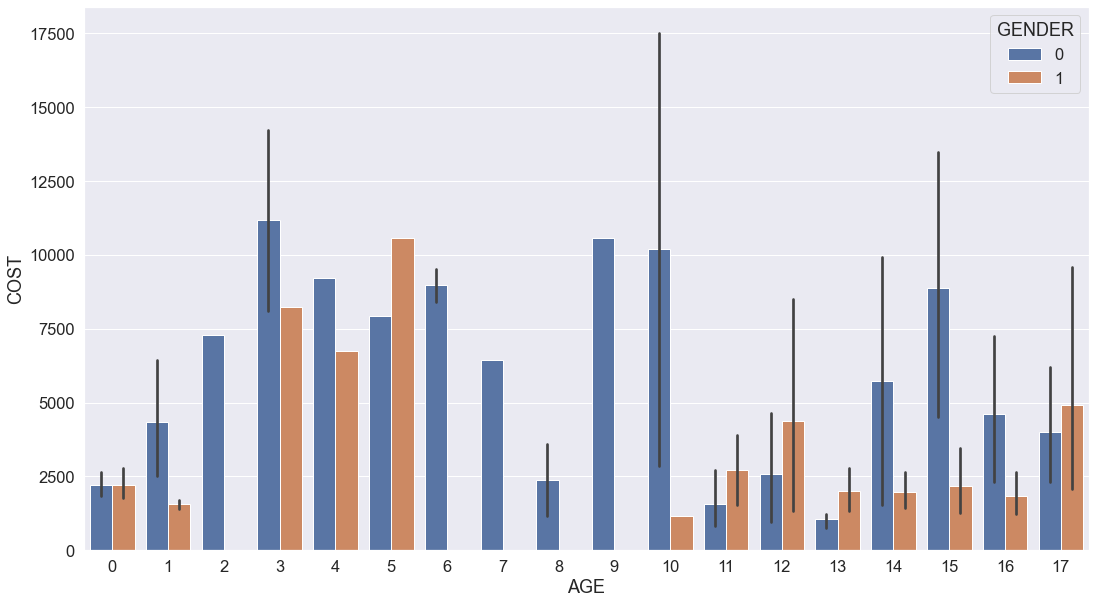

In [35]:
plt.figure(figsize=(18,10))
sns.barplot(data=df, x="AGE", y="COST", hue="GENDER")

### Task 4:
#### To properly utilize the costs, the agency has to analyze the severity of the hospital costs by age and gender for proper allocation of resources.
### Resut:
#### The cost for men is larger for all ages except 5, 11,12,13 and 17.

###  finding if the length of stay can be predicted from age, gender, and race.

<AxesSubplot:xlabel='AGE', ylabel='LOS'>

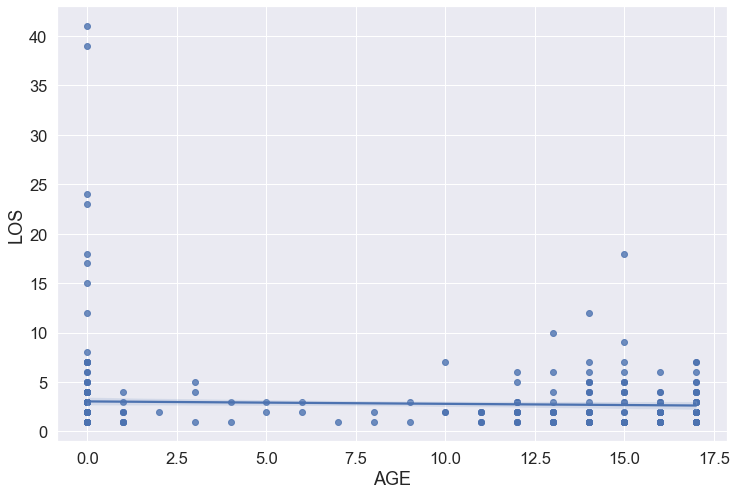

In [36]:
plt.figure(figsize=(12,8))
sns.regplot(data=df, x="AGE", y="LOS")

In [37]:
df.AGE.corr(df.LOS)

-0.049812573389842005

<AxesSubplot:xlabel='GENDER', ylabel='LOS'>

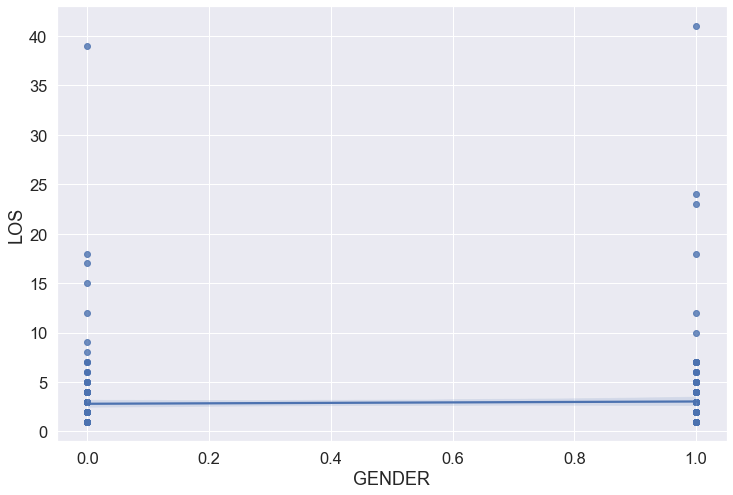

In [38]:
plt.figure(figsize=(12,8))
sns.regplot(data=df, x="GENDER", y="LOS")

In [39]:
df.GENDER.corr(df.LOS)

0.03429337296271203

<AxesSubplot:xlabel='RACE', ylabel='LOS'>

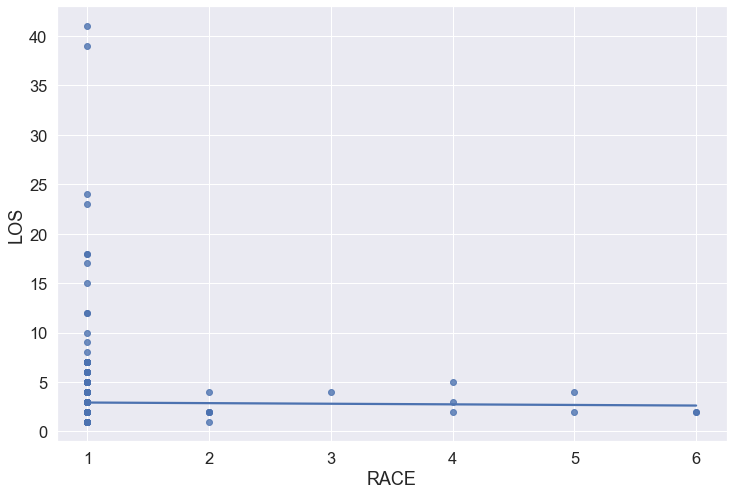

In [40]:
plt.figure(figsize=(12,8))
sns.regplot(data=df, x="RACE", y="LOS", ci=None)

In [41]:
df.RACE.corr(df.LOS)

-0.008863618307508961

### Task 5:
#### Since the length of stay is the crucial factor for inpatients, the agency wants to find if the length of stay can be predicted from age, gender, and race.
### Result:
#### Since, regression plot for AGE,GENDER and RACE are almost straight line parallel to x axis, there is no correlation between LOS and AGE,GENDER and RACE.

### finding the variable that mainly affects the hospital costs.

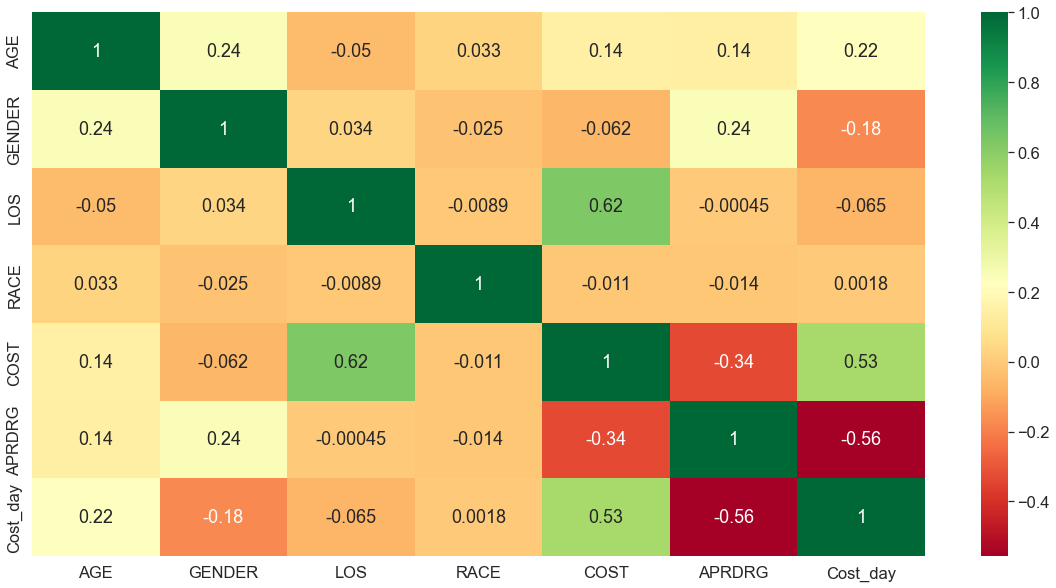

In [42]:
# Generating the correlation heat-map
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,10))
sns.heatmap( df[top_corr_features].corr(),annot=True,cmap="RdYlGn");

In [43]:
df.LOS.corr(df.COST)

0.6237080026814509

<AxesSubplot:xlabel='LOS', ylabel='COST'>

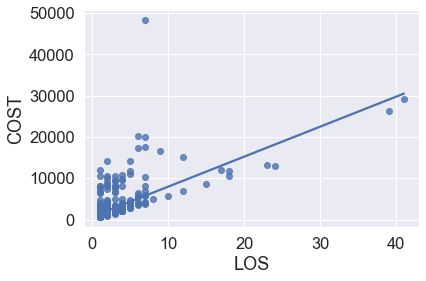

In [44]:
sns.regplot(data=df, x="LOS", y="COST", ci=None)

<AxesSubplot:xlabel='GENDER', ylabel='COST'>

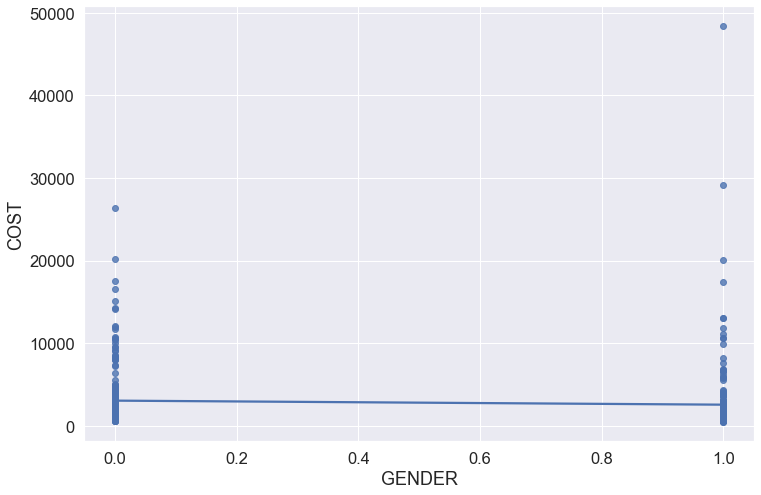

In [45]:
plt.figure(figsize=(12, 8))
sns.regplot(data=df, x="GENDER", y="COST", ci=None)

In [46]:
df.GENDER.corr(df.COST)

-0.062209422093673326

In [47]:
df.APRDRG.corr(df.COST)

-0.337549683192314

<AxesSubplot:xlabel='APRDRG', ylabel='COST'>

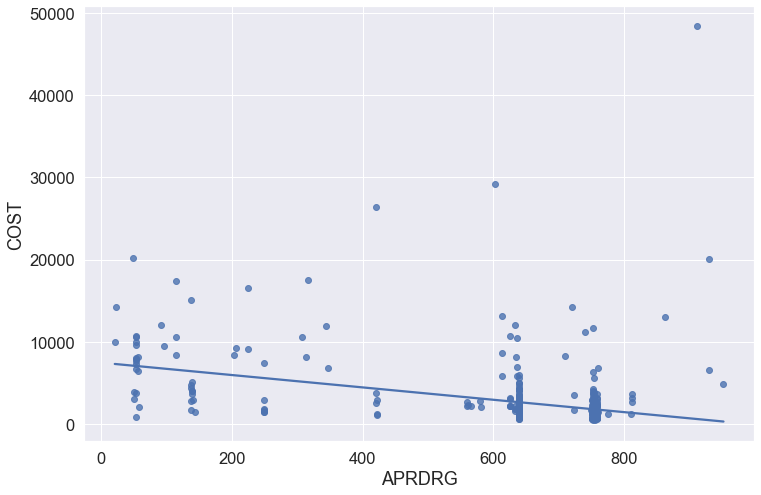

In [48]:
plt.figure(figsize=(12, 8))
sns.regplot(data=df, x="APRDRG", y="COST", ci=None)

### Task 6:
#### To perform a complete analysis, the agency wants to find the variable that mainly affects the hospital costs.
### Result:
#### We can easily see that the two factors that affect COST the most is LOS with correlation 0.6237; GENDER has the second highest correlation to cost, which is -0.06220.